Задание 7. Реализация сеточного метода решения ОДУ 2-го порядка

In [12]:
! pip install numpy
! pip install matplotlib

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

Реализация метода прогонки

In [14]:
def solve_system(left_side, right_side):
    s = [ left_side[0][1] / -left_side[0][0] ]
    t = [ -right_side[0] / -left_side[0][0] ]
    n = len(left_side)
    for i in range(1, n - 1):
        s.append(left_side[i][i + 1] / (-left_side[i][i] - left_side[i][i - 1] * s[i - 1]))
        t.append((left_side[i][i - 1] * t[i - 1] - right_side[i]) / (-left_side[i][i] - left_side[i][i - 1] * s[i - 1]))
    solution = [ (left_side[n - 1][n - 2] * t[n - 2] - right_side[n - 1]) / (-left_side[n - 1][n - 1] - left_side[n - 1][n - 2] * s[n - 2]) ]
    for i in range(n - 2, -1, -1):
        solution.append(s[i] * solution[-1] + t[i])
    solution.reverse()
    return np.array(solution)


Реализация сеточного метода

In [15]:
def solve(coefs, a, b, alphas, betas, n = 10):
    assert len(alphas) == 3, "Некорректные граничные условия"
    assert len(betas) == 3, "Некорректные граничные условия"
    assert not np.isclose(abs(alphas[0]) + abs(alphas[1]), 0), "Некорректные граничные условия"
    assert not np.isclose(abs(betas[0]) + abs(betas[1]), 0), "Некорректные граничные условия"
    assert alphas[0] * alphas[1] >= 0, "Некорректные граничные условия"
    assert betas[0] * betas[1] >= 0, "Некорректные граничные условия"
    p = coefs[0]
    q = coefs[1]
    r = coefs[2]
    f = coefs[3]
    h = (b - a) / n
    grid = [a + i * h for i in range(n + 1)]
    right_side = [ alphas[2] ]
    for i in range(1, n):
        right_side.append(f(grid[i]))
    right_side.append(betas[2])
    right_side = np.array(right_side)
    p_vals = [p(val) for val in grid]
    q_vals = [q(val) for val in grid]
    r_vals = [r(val) for val in grid]
    left_side = [ [ 0. ] * (n + 1) ]
    left_side[0][0] = alphas[0] + alphas[1] / h
    left_side[0][1] = -alphas[1] / h
    for i in range(n - 1):
        left_side.append([ 0. ] * (n + 1))
    left_side.append([ 0. ] * (n + 1))
    left_side[n][n] = betas[0] + betas[1] / h
    left_side[n][n - 1] = - betas[1] / h
    left_side = np.array(left_side)
    for i in range(1, n):
        left_side[i][i - 1] = p_vals[i] / h ** 2 - q_vals[i] / (2 * h)
        left_side[i][i] = -2 * p_vals[i] / h ** 2 + r_vals[i]
        left_side[i][i + 1] = p_vals[i] / h ** 2 + q_vals[i] / (2 * h)
    return solve_system(left_side, right_side)

Уточнение по правилу Ричардсона

In [16]:
def increase_accuracy(prev, cur, n):
    delta = np.array([ 0. ] * (n + 1))
    for i in range(0, n + 1, 2):
        delta[i] = (cur[i] - prev[i // 2]) / 3
    for i in range(1, n + 1, 2):
        delta[i] = (delta[i - 1] + delta[i + 1]) / 2
    solution = cur + delta
    return solution, max(delta)

Тестирование сеточного метода на собственной функции

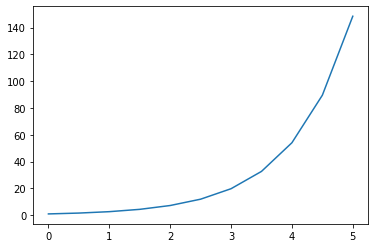

In [17]:
p = lambda x: -x
q = lambda x: x
r = lambda x: x
f = lambda x: x * math.exp(x)
A = 0
B = 5
N = 10
H = (B - A) / N
solution = solve((p, q, r, f), A, B, (1, 0, 1), (1, 0, math.exp(B)))
xaxis = np.array([A + H * i for i in range(N + 1)])
plt.plot(xaxis, solution)
plt.show()


Тестирование метода на примере из методички А. Н. Пакулиной

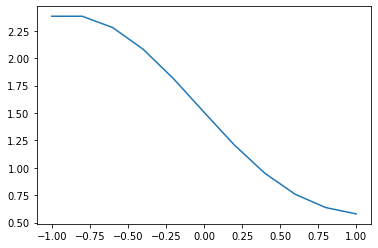

In [18]:
p = lambda x: -1 / (x + 3)
q = lambda x: -x
r = lambda x: math.log(2 + x)
f = lambda x: 1 - x / 2
A = -1
B = 1
N = 10
H = (B - A) / N
solution = solve((p, q, r, f), A, B, (0, 1, 0), (1 / 2, 1, 0))
xaxis = np.array([A + H * i for i in range(N + 1)])
plt.plot(xaxis, solution)
plt.show()

Тестирование метода с различной плотностью на примере из методички А. Н. Пакулиной

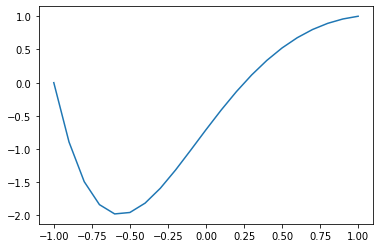

In [19]:
p = lambda x: -1 / (x - 3)
q = lambda x: 1 + x / 2
r = lambda x: math.exp(x / 2)
f = lambda x: 2 - x
A = -1
B = 1
n = 20
h = (B - A) / n
solution = solve((p, q, r, f), A , B, (1, 0, 0), (1, 0, 1), n)
xaxis = np.array([A + h * i for i in range(n + 1)])
plt.plot(xaxis, solution)
plt.show()

Погрешность:  0.007920589692304395


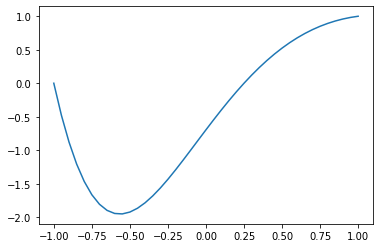

In [20]:
A = -1
B = 1
n = 40
h = (B - A) / n
prev_solution = solution
cur_solution = solve((p, q, r, f), A , B, (1, 0, 0), (1, 0, 1), n)
solution, accuracy = increase_accuracy(prev_solution, cur_solution, n)
print("Погрешность: ", accuracy)
xaxis = np.array([A + h * i for i in range(n + 1)])
plt.plot(xaxis, solution)
plt.show()

Погрешность:  1.6009353897376382e-06


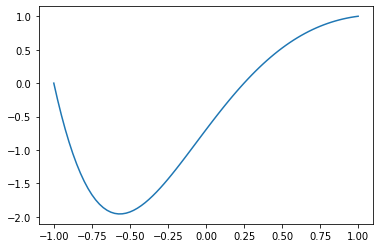

In [21]:
A = -1
B = 1
n = 80
h = (B - A) / n
prev_solution = solution
cur_solution = solve((p, q, r, f), A , B, (1, 0, 0), (1, 0, 1), n)
solution, accuracy = increase_accuracy(prev_solution, cur_solution, n)
print("Погрешность: ", accuracy)
xaxis = np.array([A + h * i for i in range(n + 1)])
plt.plot(xaxis, solution)
plt.show()